In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from matplotlib import gridspec

from sklearn.preprocessing import scale

from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

from torch.utils.data import Dataset

from sklearn.utils import shuffle
from scipy.special import softmax

from PIL import Image

from PIL import ImageDraw

from skimage import morphology

import pickle

In [2]:
plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rcParams['text.latex.unicode'] = True

In [3]:
plt.rcParams['text.usetex'] = False

In [4]:
plt.rcParams['text.latex.preamble'] = [r'\usepackage[utf8x]{inputenc}', 
                                       r'\usepackage[english,russian]{babel}', 
                                       r'\usepackage{amsmath}']

In [5]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 40

In [6]:
color = ['black', 'gray', 'black', 'black', 'black']
color = ['blue', 'red', 'black', 'black', 'black']
marker = ['^', 's', 'v', 'D', 'P']

In [8]:
from Mixture import EachModelLinear, HyperModelNN, MixtureExpert, RegularizeModel

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
np.random.seed(0)
N = 100
n = 2

w1 = np.random.randn(n)
X1 = np.random.multivariate_normal(-3*np.ones(n), np.eye(n), size = N)

w2 = np.random.randn(n)
X2 = np.random.multivariate_normal(3*np.ones(n), np.eye(n), size = N)

X = np.vstack([X1, X2])

Y = np.vstack([X1@w1, X2@w2])


In [ ]:
W = np.array([w1, w2])

# Mixture of Model Picture

# Mixture of Experts Picture

In [11]:
X_tr = torch.FloatTensor(X)
Y_tr = torch.FloatTensor(Y).view([-1,1])

X_tr.shape, Y_tr.shape

(torch.Size([200, 2]), torch.Size([200, 1]))

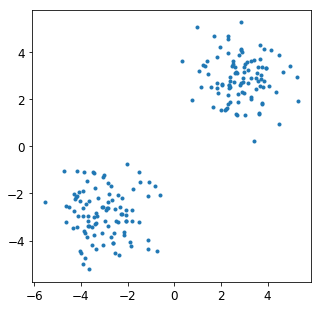

In [12]:
FONT_SIZE = 12

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['axes.titlesize']=FONT_SIZE
plt.rcParams['axes.labelsize']=FONT_SIZE
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['font.size'] = FONT_SIZE
##############################################

_ = plt.plot(X[:, 0], X[:, 1], '.')

In [13]:
K = 2
epoch = 10

In [14]:
List_of_ind = []
List_of_W = []

LoM = []
for k in range(K):
    LoM.append(EachModelLinear(input_dim = n, device = device))

HypPar = {'beta': 1}

HpMd = HyperModelNN(input_dim = n, hidden_dim = 5, output_dim = K, device = device, epochs=1000)

model = MixtureExpert(input_dim = n, K = K, HyperParameters = HypPar, HyperModel = HpMd, ListOfModels = LoM, device = device)

for _ in tqdm(range(epoch)):
    model.fit(X_tr, Y_tr, 1, progress = None)
    List_of_ind.append(np.argmax(model.predict(X_tr)[1], axis = 1))
    List_of_W.append(np.array([m.W.data.numpy().reshape(-1) for m in model.ListOfModels]))
    

In [15]:
np.array([m.W.data.numpy().reshape(-1) for m in model.ListOfModels])

array([[1.099616 , 0.6553774],
       [1.7639923, 0.4002285]], dtype=float32)

In [16]:
W

array([[1.76405235, 0.40015721],
       [1.0996596 , 0.65526373]])

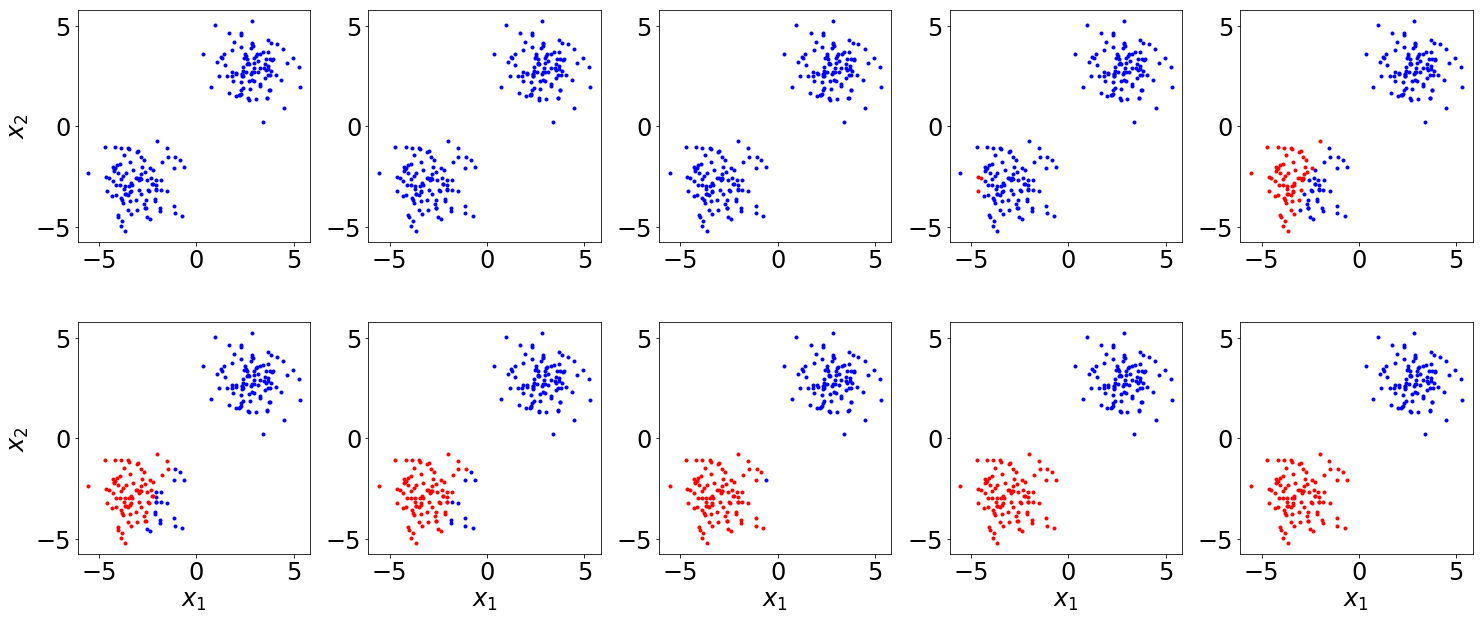

In [17]:
FONT_SIZE = 24

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['axes.titlesize']=FONT_SIZE
plt.rcParams['axes.labelsize']=FONT_SIZE
plt.rcParams['figure.figsize'] = (25.0, 10.0)
plt.rcParams['font.size'] = FONT_SIZE
##############################################

t = np.linspace(0, 2*np.pi, 100)

colors = color


fig = plt.figure();

gs = gridspec.GridSpec(2, 5)

ax = []
for i, g in enumerate(gs):
    ax.append(fig.add_subplot(g))
    if (len(ax) - 1) % 5 == 0:
        ax[-1].set_ylabel('$x_2$')
    if len(ax) > 5:
        ax[-1].set_xlabel('$x_1$')
    

for e, (idx, W) in enumerate(zip(List_of_ind[:10], List_of_W[:10])):
    for i in np.unique(idx):
        indexes = np.where(idx == i)
        _ = ax[e].plot(X[indexes, 0], X[indexes, 1], '.', color=color[i])

plt.subplots_adjust(wspace=0.25, hspace=0.35)
        
plt.show()